<a href="https://www.kaggle.com/code/ibrahimnibrahim/street-foods-classification-f1-0-86?scriptVersionId=244230904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/popular-street-foods
/kaggle/input/popular-street-foods/popular_street_foods
/kaggle/input/popular-street-foods/popular_street_foods/dataset
/kaggle/input/popular-street-foods/popular_street_foods/dataset/poutine
/kaggle/input/popular-street-foods/popular_street_foods/dataset/falafel
/kaggle/input/popular-street-foods/popular_street_foods/dataset/arepas
/kaggle/input/popular-street-foods/popular_street_foods/dataset/burger
/kaggle/input/popular-street-foods/popular_street_foods/dataset/pani_puri
/kaggle/input/popular-street-foods/popular_street_foods/dataset/empanadas
/kaggle/input/popular-street-foods/popular_street_foods/dataset/fish_and_chips
/kaggle/input/popular-street-foods/popular_street_foods/dataset/bánh_mì
/kaggle/input/popular-street-foods/popular_street_foods/dataset/kebab_(shish_kebab)
/kaggle/input/popular-street-foods/popular_street_foods/dataset/pizza_slice
/kaggle/input/popular-street-foods/popular_street_foods/dataset/churros
/kaggle/input/

In [2]:
import tensorflow as tf

train_ds,test_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/popular-street-foods/popular_street_foods/dataset/',
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=(128, 128),
    batch_size=32,
    label_mode="categorical"
)
class_names=train_ds.class_names

2025-06-07 13:46:07.547418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749303967.729069      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749303967.789845      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 3674 files belonging to 20 classes.
Using 2940 files for training.
Using 734 files for validation.


I0000 00:00:1749303981.661082      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [3]:
train=train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE).shuffle(buffer_size=1000)
test=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [4]:
from tensorflow.keras.applications import EfficientNetV2S

base_model = EfficientNetV2S(
    weights='imagenet',  
    input_shape=(256, 256, 3),
    include_top=False    
)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])


inputs = tf.keras.layers.Input(shape=(128, 128, 3))
x = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(inputs)
# x = data_augmentation(x)        
x = base_model(x)        
x = tf.keras.layers.GlobalAveragePooling2D()(x)    
x = tf.keras.layers.Dense(512, activation='relu')(x)  
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(20, activation='softmax')(x) 

final_model = tf.keras.models.Model(inputs=inputs, outputs=x)

final_model.summary()

82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-s (Functional)        │ (None, 8, 8, 1280)          │      20,331,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,997,492 (80.10 MB)

 Trainable params: 20,843,620 (79.51 MB)

 Non-trainable params: 153,872 (601.06 KB)

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5,  
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=3, 
    min_lr=1e-7
)


class StopOnValAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target=0.985):
        super().__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc is not None and val_acc >= self.target:
            print(f"\nReached {val_acc:.2%} val_accuracy — stopping training.")
            self.model.stop_training = True

In [6]:
# unFreeze the base model
base_model.trainable = True

# Compile the model
final_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if your labels are integers
    metrics=['accuracy']
)


final_model.fit(train, epochs=100, validation_data=test,callbacks=[early_stopping,reduce_lr]) 

Epoch 1/100


I0000 00:00:1749304106.745820      64 service.cc:148] XLA service 0x7998dc0032f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749304106.746543      64 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749304117.240657      64 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1749304133.173885      64 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304133.369195      64 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304133.858497      64 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304134.0644

 9/92 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - accuracy: 0.0796 - loss: 3.0403

E0000 00:00:1749304193.675883      66 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304193.869469      66 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304194.371668      66 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304194.576521      66 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749304195.136116      66 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

92/92 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.1415 - loss: 2.8821 - val_accuracy: 0.5545 - val_loss: 2.0382 - learning_rate: 1.0000e-04
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.6648 - loss: 1.5330 - val_accuracy: 0.7698 - val_loss: 0.8742 - learning_rate: 1.0000e-04
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.8857 - loss: 0.4902 - val_accuracy: 0.8161 - val_loss: 0.5853 - learning_rate: 1.0000e-04
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.9773 - loss: 0.1619 - val_accuracy: 0.8365 - val_loss: 0.5111 - learning_rate: 1.0000e-04
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.9906 - loss: 0.0647 - val_accuracy: 0.8392 - val_loss: 0.5309 - learning_rate: 1.0000e-04
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.9958 - loss: 0.0345 - val_accuracy: 0.8420 - val_loss: 0.5353 - learning_rate: 1.0000e-04
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred_probs = []

for images, labels in test:
    y_true.extend(labels.numpy())
    y_pred_probs.extend(final_model.predict(images, verbose=0))

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Check if labels are one-hot encoded
if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = np.argmax(y_true, axis=1)

y_pred = np.argmax(y_pred_probs, axis=1)

report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
)

print("Classification Report:")
print(report)

Classification Report:
                     precision    recall  f1-score   support

             arepas     0.8750    0.7241    0.7925        29
             burger     0.9643    0.9643    0.9643        28
            bánh_mì     0.7500    0.7241    0.7368        29
            churros     0.9318    0.9535    0.9425        43
             crepes     0.9394    0.7561    0.8378        41
         currywurst     0.8158    0.7949    0.8052        39
          empanadas     0.7273    0.7805    0.7529        41
            falafel     0.8276    0.8276    0.8276        29
     fish_and_chips     0.9302    0.8889    0.9091        45
             gelato     0.9348    0.9773    0.9556        44
            hot_dog     0.8800    0.7857    0.8302        28
kebab_(shish_kebab)     0.7419    0.7419    0.7419        31
           pad_thai     0.9000    1.0000    0.9474        27
          pani_puri     0.7708    0.9024    0.8315        41
        pizza_slice     0.9355    1.0000    0.9667        29


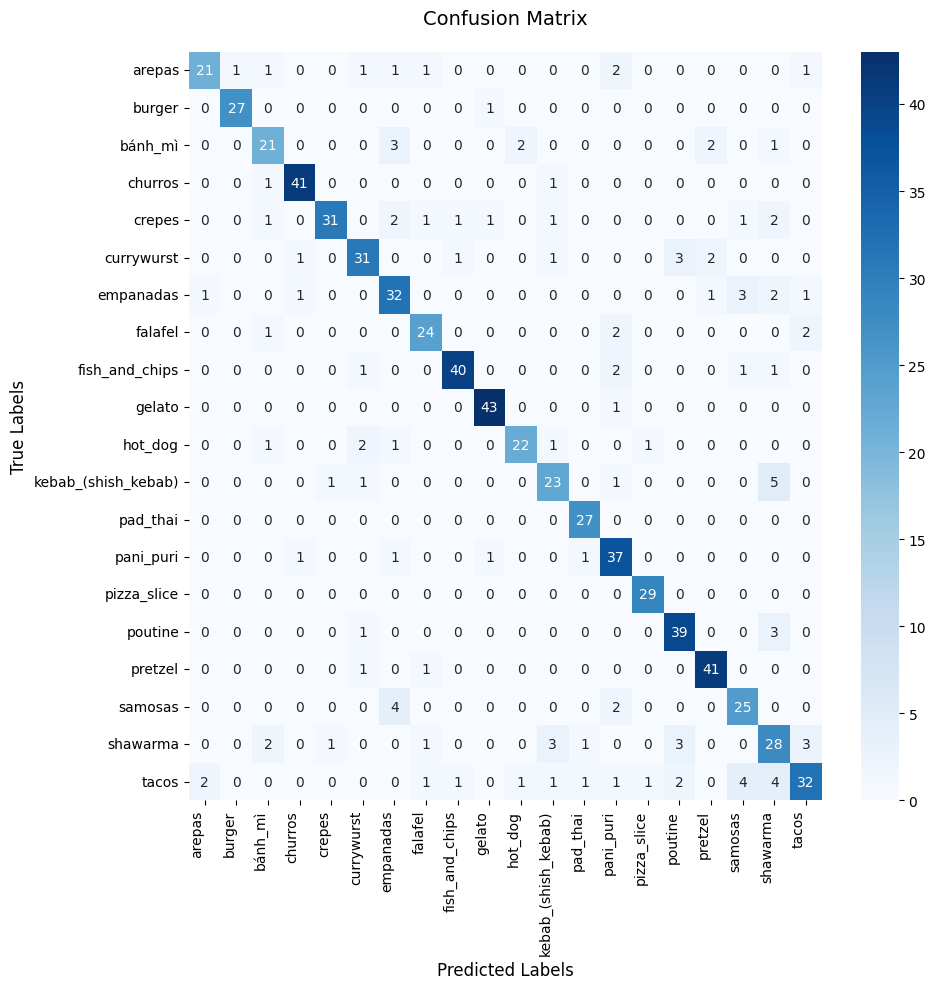

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Plots a beautiful confusion matrix with annotations
    
    Args:
        y_true: Array of true labels
        y_pred: Array of predicted labels
        class_names: List of class names
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create figure
    plt.figure(figsize=(10, 10))
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, 
                yticklabels=class_names)
    
    # Add labels and title
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14, pad=20)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Usage with your TensorFlow dataset
# 1. Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test:
    # Get true labels (convert from one-hot if needed)
    if len(labels.shape) > 1:  # If one-hot encoded
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    else:
        y_true.extend(labels.numpy())
    
    # Get predictions
    preds = final_model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))

# 2. Get class names
# class_names = test_dataset.class_names

# 3. Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, class_names)

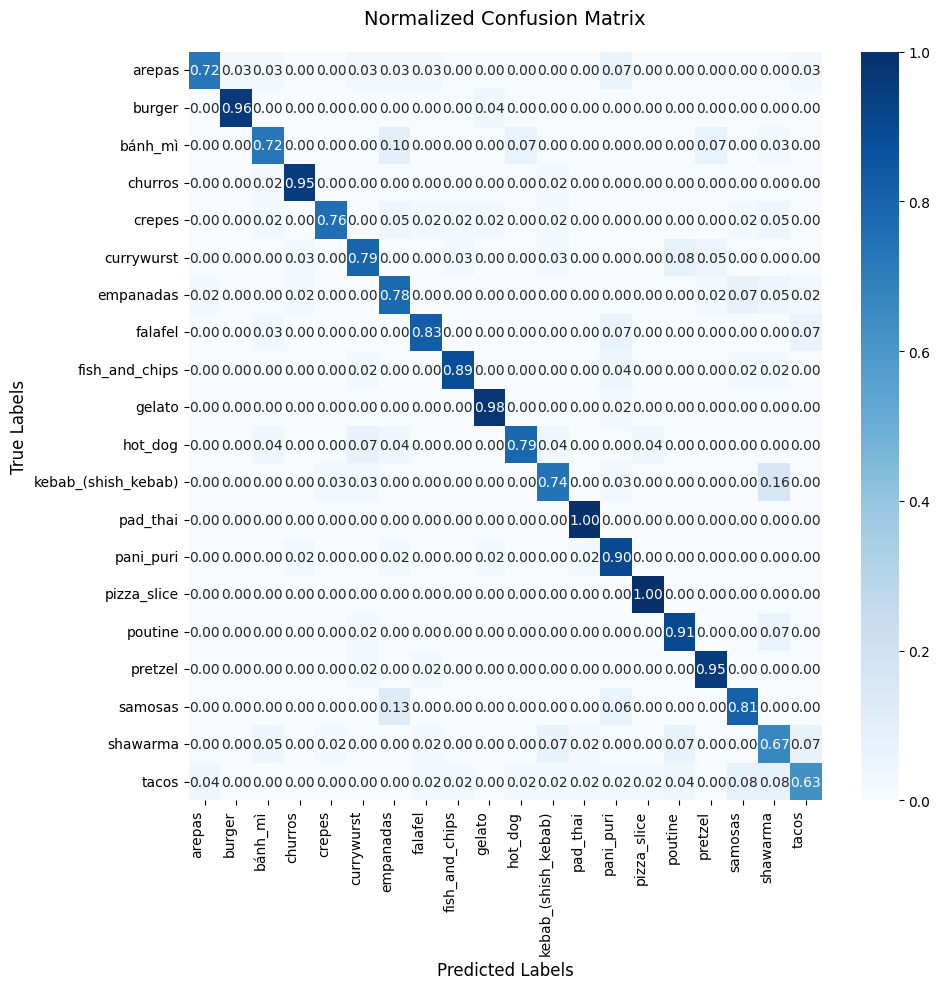

In [9]:
def plot_normalized_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, 
                yticklabels=class_names,
                vmin=0, vmax=1)
    
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.title('Normalized Confusion Matrix', fontsize=14, pad=20)
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

plot_normalized_confusion_matrix(y_true, y_pred, class_names)

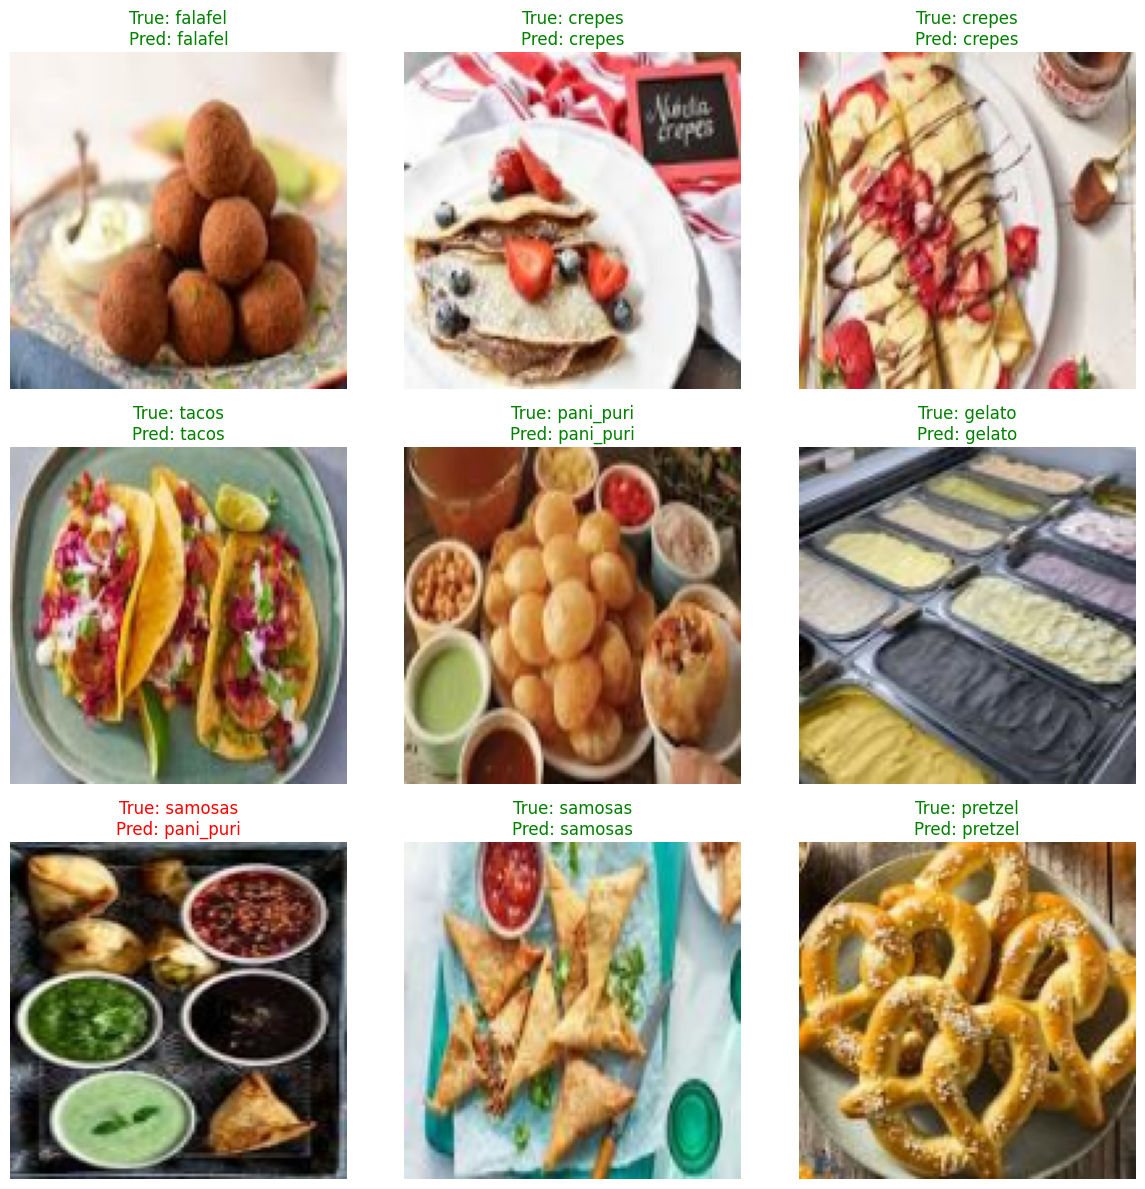

In [10]:
def plot_predictions(model, dataset, class_names, num_images=9):
    """
    Plots images with their true and predicted labels
    
    Args:
        model: Trained Keras model
        dataset: TensorFlow dataset (batched)
        class_names: List of class names
        num_images: Number of images to display (default 9)
    """
    plt.figure(figsize=(12, 12))
    
    # Take one batch from the dataset
    for images, labels in dataset.take(1):
        # Make predictions
        preds = final_model.predict(images, verbose=0)
        pred_classes = np.argmax(preds, axis=1)
        
        # Convert one-hot labels if needed
        if len(labels.shape) > 1:
            true_classes = np.argmax(labels.numpy(), axis=1)
        else:
            true_classes = labels.numpy()
        
        # Plot images
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(3, 3, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            
            # Set title with color coding
            true_label = class_names[true_classes[i]]
            pred_label = class_names[pred_classes[i]]
            
            color = 'green' if true_label == pred_label else 'red'
            plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
            plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Usage
plot_predictions(final_model, test, class_names)